In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [171]:
df = pd.read_csv('data/train.csv')

In [172]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [173]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [174]:
selected_features = [
    'LotArea',
    'TotalBsmtSF',
    'BsmtQual',
    'GrLivArea',
    '1stFlrSF',
    '2ndFlrSF',
    'FireplaceQu',
]

In [175]:
df[selected_features]

,LotArea,TotalBsmtSF,BsmtQual,GrLivArea,1stFlrSF,2ndFlrSF,FireplaceQu
0,8450,856,Gd,1710,856,854,NaN
1,9600,1262,Gd,1262,1262,0,TA
2,11250,920,Gd,1786,920,866,TA
3,9550,756,TA,1717,961,756,Gd
4,14260,1145,Gd,2198,1145,1053,TA
...,...,...,...,...,...,...,...
1455,7917,953,Gd,1647,953,694,TA
1456,13175,1542,Gd,2073,2073,0,TA
1457,9042,1152,TA,2340,1188,1152,Gd
1458,9717,1078,TA,1078,1078,0,NaN


In [176]:
df = df[[
    'LotArea',
    'TotalBsmtSF',
    'GrLivArea',
    '1stFlrSF',
    '2ndFlrSF',
    'SalePrice'
]]      

In [177]:
df

,LotArea,TotalBsmtSF,GrLivArea,1stFlrSF,2ndFlrSF,SalePrice
0,8450,856,1710,856,854,208500
1,9600,1262,1262,1262,0,181500
2,11250,920,1786,920,866,223500
3,9550,756,1717,961,756,140000
4,14260,1145,2198,1145,1053,250000
...,...,...,...,...,...,...
1455,7917,953,1647,953,694,175000
1456,13175,1542,2073,2073,0,210000
1457,9042,1152,2340,1188,1152,266500
1458,9717,1078,1078,1078,0,142125


In [178]:
W = np.random.normal(0, 1, [5, 1])
b = np.random.normal(7, 1)

In [179]:
X = df.drop('SalePrice', axis = 1).to_numpy()

In [180]:
y = df['SalePrice'].to_numpy().reshape(1460, 1)

In [181]:
y_pred = np.matmul(X, W) + b

In [182]:
y_pred

array([[10973.85343189],
       [13859.16620639],
       [15201.83309199],
       ...,
       [11165.46325971],
       [14163.82583803],
       [14379.73530492]])

### Calculate Loss and cost

In [183]:
loss = (1 / 2) * ((y_pred - y) ** 2)

In [184]:
m = len(loss)

In [185]:
cost = np.sum(loss) / m

In [186]:
cost

16783884660.212244

## Gradient Descent Update Rule

In [193]:
grad_W = np.sum(X * (y_pred - y), axis = 0) / m

In [204]:
grad_W = grad_W.reshape(5, 1)

In [205]:
db = np.sum(y_pred - y) / m

In [206]:
eta = 0.01

In [207]:
W = W - eta * grad_W
b = b - eta * db

In [212]:
W = np.random.normal(0, 1, [5, 1])
b = np.random.normal(7, 1)
cost_per_iter = []

In [213]:
for i in range(10):
    y_pred = np.matmul(X, W) + b
    
    loss = (1 / 2) * ((y_pred - y) ** 2)
    cost = np.sum(loss) / m
    cost_per_iter.append(cost)
    
    grad_W = np.sum(X * (y_pred - y), axis = 0) / m
    grad_W = grad_W.reshape(5, 1)
    
    db = np.sum(y_pred - y) / m
    
    W = W - eta * grad_W
    b = b - eta * db

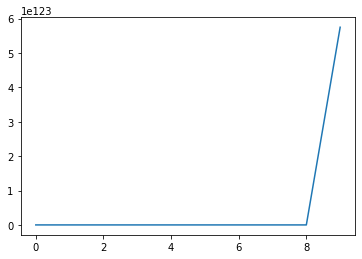

In [214]:
plt.plot(np.arange(len(cost_per_iter)), cost_per_iter)

In [215]:
from sklearn.linear_model import LinearRegression

In [216]:
model = LinearRegression()

In [217]:
model.fit(X, y)

LinearRegression()

In [219]:
y_pred = model.predict(X)

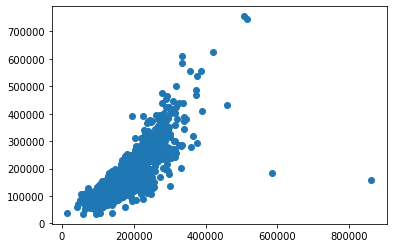

In [220]:
plt.scatter(y_pred, y)
plt.show()